In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]
x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [4]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

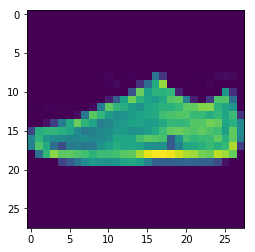

In [5]:
# lets see what the images look like

image = x_train[5, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [6]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [11]:
cnn_model= Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout-1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
Dropout-2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
Conv2D-3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
Dropout-3 (Dropout)          (None, 9, 9, 128)        

In [12]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
from sklearn.metrics import accuracy_score
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate, y_validate)
    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 45s 943us/step - loss: 0.8173 - accuracy: 0.6957 - val_loss: 0.4769 - val_accuracy: 0.8183
Epoch 2/50
48000/48000 [==============================] - 48s 999us/step - loss: 0.4947 - accuracy: 0.8189 - val_loss: 0.3667 - val_accuracy: 0.8618
Epoch 3/50
48000/48000 [==============================] - 47s 990us/step - loss: 0.4216 - accuracy: 0.8459 - val_loss: 0.3217 - val_accuracy: 0.8809
Epoch 4/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.3808 - accuracy: 0.8631 - val_loss: 0.2991 - val_accuracy: 0.8857
Epoch 5/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3497 - accuracy: 0.8718 - val_loss: 0.2829 - val_accuracy: 0.8938
Epoch 6/50
48000/48000 [==============================] - 64s 1ms/step - loss: 0.3293 - accuracy: 0.8806 - val_loss: 0.2745 - val_accuracy: 0.8975
Epoch 7/50
48000/48000 [==============================] - 48s 

In [15]:
 
  
# Save the trained model as a pickle string. 
cnn_model.save("fmnist_model.h5")
  
# Load the pickled model 
#knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
#knn_from_pickle.predict(X_test) 

In [17]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test acc: {:.4f}'.format(score[1]*100))

test loss: 0.2082
test acc: 93.8200


In [ ]:
import keras.backend as K
out_layer=cnn_model.layers[9].output
output_fn= K.function([cnn_model.input],out_layer)
o=output_fn([x_test])
print(o.shape)

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.estimator.ProfilerHook(10)

In [20]:
PATH = os.getcwd()

LOG_DIR = PATH + '/log1/'
metadata = os.path.join(LOG_DIR, 'metadata.tsv')

embedding_var = tf.Variable(o, name='fmnist_embedding')


        
with tf.compat.v1.Session() as sess:
    saver = tf.compat.v1.train.Saver([embedding_var])

    sess.run(embedding_var.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'model.ckpt'))

    config = projector.ProjectorConfig()
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_var.name
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = metadata
    embedding.sprite.image_path = os.path.join(LOG_DIR, 'sprite.png')
    embedding.sprite.single_image_dim.extend([28, 28])
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.compat.v1.summary.FileWriter(LOG_DIR), config)
    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


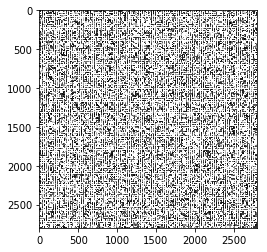

In [21]:
# create the sprite image and the metadata file

rows = 28
cols = 28

label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

In [22]:
!tensorboard --logdir=./log1/

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.2 at http://localhost:6007/ (Press CTRL+C to quit)
^C
